In [13]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
import scipy.stats as stats
import random
from sklearn.linear_model import LinearRegression

# library written for this exercise providing additional functions for assignment submission, and others
import utils 

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

##### Univariate Linear Regression from Scratch

In [14]:
x = stats.uniform.rvs(0, 1, 1000) * 10
y = -30.1415 + (5.5 * x) + stats.norm.rvs(2.4, 7.2, 1000)

df = pd.DataFrame({'bias': np.ones(1000), 'x': x, 'y': y})
df.head()

,bias,x,y
0,1.0,4.295693,-4.945946
1,1.0,0.411399,-31.853019
2,1.0,1.899913,-11.533227
3,1.0,6.624407,14.030866
4,1.0,8.203154,23.083267


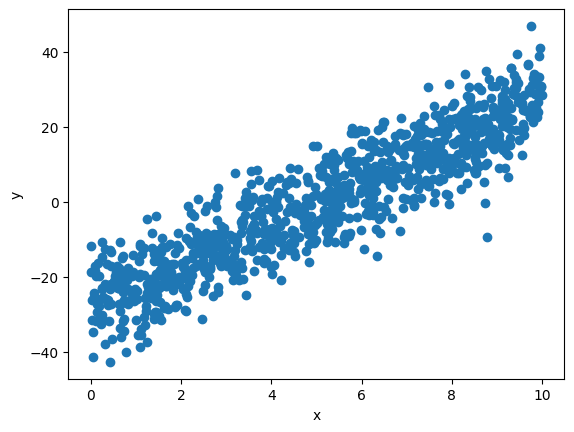

In [15]:
plt.scatter(df['x'], df['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
# Prepare the data (including the bias term as the first column)
y = df['y'].values.reshape(1, -1)
X = df[['bias', 'x']].values.T

X.shape, y.shape

((2, 1000), (1, 1000))

In [17]:
# Initialize theta (including bias and slope) with any random values between -1 and 1 
# i.e uniform(-1, 1)
theta = stats.uniform.rvs(-1, 1, size=(X.shape[0], 1))  # Includes bias and slope
theta.shape

(2, 1)

In [18]:
theta

array([[-0.15224987],
       [-0.95921849]])

In [19]:
# let's define the cost function

def cost_function(theta: np.array, X: np.array, y: np.array, m: int=X.shape[1]):
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    cost = (1./(2*m)) * np.sum(diff**2)
    
    return cost


# let's define a function to get the gradients

def get_gradient(theta: np.array, X: np.array, y: np.array, m: int=X.shape[1]):
    # h(X) - y
    diff = np.dot(theta.T, X) - y
    
    gradient = (1./m) * np.dot(X, diff.T)
    
    return gradient


In [20]:

def run(n_iterations: int=10000, lr: float=0.001):
    # Initialize theta
    theta = stats.uniform.rvs(-1, 1, size=(X.shape[0], 1))
    
    # to plot the cost over the iteration
    costs = []
    
    for i in range(n_iterations):
        cost = cost_function(theta=theta, X=X, y=y)
        costs.append(cost)
        
        if (i % 10) == 0:
            print(f"The cost at {i}th iteration is {cost}")
            print(f"Theta: {theta.T}")
            print("************************************************\n")
        
        gradient = get_gradient(theta=theta, X=X, y=y)
        
        # update the theta 
        theta = theta - (lr * gradient)
    
    return theta, np.array(costs)

In [21]:
n_iterations = 20000

optimal_theta, costs = run(n_iterations=n_iterations)
optimal_theta

The cost at 0th iteration is 203.2230917722307
Theta: [[-0.74665817 -0.83988069]]
************************************************

The cost at 10th iteration is 157.65370613533452
Theta: [[-0.71056928 -0.16335988]]
************************************************

The cost at 20th iteration is 135.11498573209312
Theta: [[-0.70435712  0.31304365]]
************************************************

The cost at 30th iteration is 123.8613468884081
Theta: [[-0.71901338  0.64936418]]
************************************************

The cost at 40th iteration is 118.13792328275674
Theta: [[-0.74823262  0.887624  ]]
************************************************

The cost at 50th iteration is 115.12505822118332
Theta: [[-0.78760132  1.05723752]]
************************************************

The cost at 60th iteration is 113.44122922896852
Theta: [[-0.83403022  1.17879399]]
************************************************

The cost at 70th iteration is 112.40954155020823
Theta: [[-0.8853

array([[-27.59572384],
       [  5.46195241]])

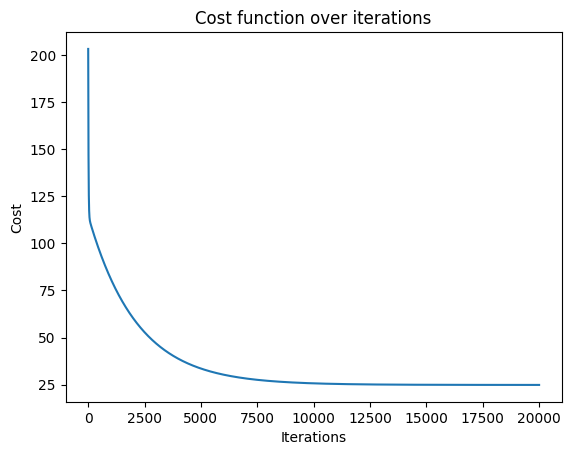

In [22]:
# Plot the cost over iterations
plt.plot(range(n_iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function over iterations')
plt.show()

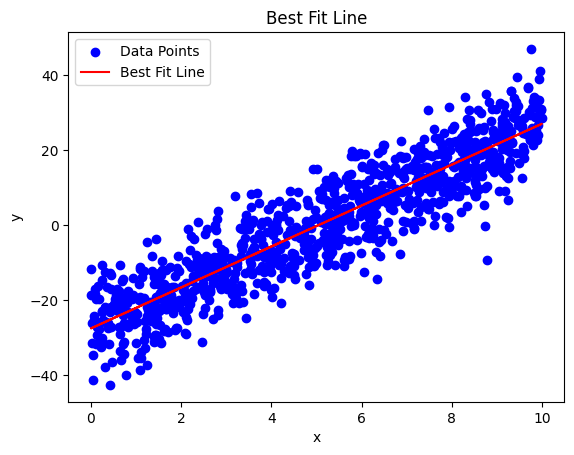

In [23]:
# Compute the predicted y values (best fit line) using the optimal theta
# y_pred = theta_0 + theta_1 * x
y_pred = optimal_theta[0] + optimal_theta[1] * df['x']

# Plot the original data points
plt.scatter(df['x'], df['y'], color='blue', label='Data Points')

# Plot the best fit line
plt.plot(df['x'], y_pred, color='red', label='Best Fit Line')

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Line')

# Show the legend
plt.legend()
plt.show()

##### Using Sklearn

In [24]:
# Reshape the feature (x) and fit the linear regression model
# X = df[['x']]  # Use 'x' as the independent variable
model = LinearRegression()

# Fit the model
model.fit(df[['x']], df['y'])

# Model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: -27.85307997317814
Coefficient: 5.500570883108405
